In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# tf.compat.v1.disable_eager_execution()


from Architectures.factorizer import Factorizer
from Architectures.ifn import mine_loss, joint, marginal, MI
from Architectures.dnn import DNN

# Data

In [30]:
x = np.expand_dims(np.random.binomial(1, 0.5, 10000), 1).astype(np.float32)
y = x

# Model

In [31]:
input_x = keras.layers.Input(shape=(1,))
h = keras.layers.Dense(16, activation='relu')(input_x)
h = keras.layers.Dense(16, activation='relu')(h)
output_x = keras.layers.Dense(1, activation='sigmoid')(h)
x_network_template = keras.Model(inputs=input_x, outputs=output_x)

input_y = keras.layers.Input(shape=(1,))
h = keras.layers.Dense(16, activation='relu')(input_y)
h = keras.layers.Dense(16, activation='relu')(h)
output_y = keras.layers.Dense(1, activation='sigmoid')(h)
y_network_template = keras.Model(inputs=input_y, outputs=output_y)




# x_network_template = DNN(1, [16, 16], 1, output_act = "sigmoid")
# y_network_template = DNN(1, [16, 16], 1, output_act = "sigmoid")


In [32]:
N = 2
f = []
opt = tf.keras.optimizers.Adam(clipnorm = 1.0, learning_rate = 1e-3)
for i in range(N):
    f.append(Factorizer(i+1, x_network_template, y_network_template))
    f[i].compile(loss=mine_loss, optimizer=opt, metrics = [MI, joint, marginal], run_eagerly=True,)


# Fits

Epoch 1/50
20/20 - 1s - loss: 1.4038e-07 - MI: -1.3709e-07 - joint: -1.3703e+00 - marginal: -1.3703e+00
Epoch 2/50
20/20 - 1s - loss: -2.1553e-08 - MI: 2.3842e-08 - joint: -1.3656e+00 - marginal: -1.3656e+00
Epoch 3/50
20/20 - 1s - loss: 1.5450e-08 - MI: -1.7881e-08 - joint: -1.3679e+00 - marginal: -1.3679e+00
Epoch 4/50
20/20 - 1s - loss: 3.0136e-08 - MI: -2.3842e-08 - joint: -1.3713e+00 - marginal: -1.3713e+00
Epoch 5/50
20/20 - 1s - loss: -1.1635e-07 - MI: 1.1921e-07 - joint: -1.3735e+00 - marginal: -1.3735e+00
Epoch 6/50
20/20 - 1s - loss: -2.4796e-09 - MI: -5.9605e-09 - joint: -1.3764e+00 - marginal: -1.3764e+00
Epoch 7/50
20/20 - 1s - loss: 4.5586e-08 - MI: -4.1723e-08 - joint: -1.3781e+00 - marginal: -1.3781e+00
Epoch 8/50
20/20 - 1s - loss: 4.8828e-08 - MI: -4.7684e-08 - joint: -1.3775e+00 - marginal: -1.3775e+00
Epoch 9/50
20/20 - 1s - loss: 9.3460e-09 - MI: -1.1921e-08 - joint: -1.3803e+00 - marginal: -1.3803e+00
Epoch 10/50
20/20 - 1s - loss: -1.1826e-08 - MI: 5.9605e-09 - j

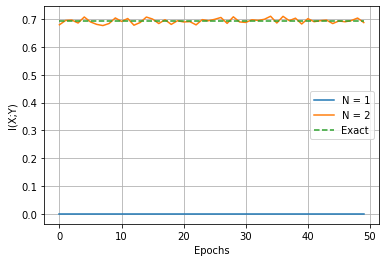

In [46]:
epochs = 50
batch_size = 512

for i in range(N):
    history = f[i].fit([x, y], batch_size= batch_size, epochs = epochs, shuffle=True, verbose= 2)
    plt.plot(history.history["MI"], label = "N = %d" % (i+1))

plt.plot(np.log(2.0) * np.ones(epochs), linestyle = "--", label = "Exact")
plt.xlabel("Epochs")
plt.ylabel("I(X;Y)")
plt.grid()
plt.legend()

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.9997988], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0.7643519 , 0.23390715], dtype=float32)>


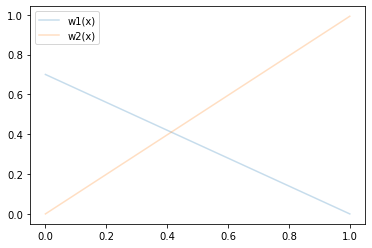

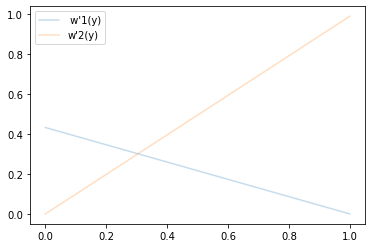

In [47]:
for i in range(N):
    print(f[i].f_weights)

f2 = f[1]
xs = np.expand_dims((0.0, 1.0),1)
ys = np.expand_dims((0.0, 1.0),1)

plt.plot(f2.x_networks[0](xs).numpy(), alpha = 0.25, label = "w1(x)")
plt.plot(f2.x_networks[1](xs).numpy(), alpha = 0.25, label = "w2(x)")
plt.legend()
plt.show()
plt.close()

plt.plot(f2.y_networks[0](xs).numpy(), alpha = 0.25, label = " w'1(y)")
plt.plot(f2.y_networks[1](xs).numpy(), alpha = 0.25, label = "w'2(y)")
plt.legend()
plt.show()
plt.close()

xs = np.expand_dims((0.0, 0.0, 1.0, 1.0),1)
ys = np.expand_dims((0.0, 1.0, 0.0, 1.0),1)
print()

